# Import

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import time
import warnings
import numpy as np
import nltk
import spacy
from nltk.corpus import stopwords
import string
from nltk.corpus import stopwords
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics.classification import accuracy_score, log_loss
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier
from imblearn.over_sampling import SMOTE
from collections import Counter
from scipy.sparse import hstack
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.feature_extraction import text
from collections import Counter, defaultdict
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import math
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from nltk.corpus import stopwords
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import normalized_mutual_info_score
from sklearn.ensemble import RandomForestClassifier
from nltk.corpus import wordnet
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import pandas as pd
from collections import Counter, defaultdict
import re
from math import log
warnings.filterwarnings("ignore")
from mlxtend.classifier import StackingClassifier
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported f

# Data Import

In [2]:
## Data Import
dataset_news = pd.read_csv("/content/Combined_News_DJIA.csv")

In [3]:
## Merge all columns into one text

for col in dataset_news.columns:
  if(col != 'Date' or col != 'Label'):
    dataset_news[col] = dataset_news[col].astype(str)
df = pd.DataFrame(dataset_news.iloc[:,2:].apply(lambda x: ''.join(x), axis=1), columns = ['text'])

In [4]:
df['Date'] = dataset_news['Date']
df['Label'] = dataset_news['Label']

In [5]:
df2=pd.read_csv("upload_DJIA_table.csv")

In [6]:
df = df.merge(df2,on="Date")

In [7]:
df.head()

,text,Date,Label,Open,High,Low,Close,Volume,Adj Close
0,"b""Georgia 'downs two Russian warplanes' as cou...",2008-08-08,0,11432.089844,11759.959961,11388.040039,11734.320312,212830000,11734.320312
1,b'Why wont America and Nato help us? If they w...,2008-08-11,1,11729.669922,11867.110352,11675.530273,11782.349609,183190000,11782.349609
2,b'Remember that adorable 9-year-old who sang a...,2008-08-12,0,11781.700195,11782.349609,11601.519531,11642.469727,173590000,11642.469727
3,b' U.S. refuses Israel weapons to attack Iran:...,2008-08-13,0,11632.809570,11633.780273,11453.339844,11532.959961,182550000,11532.959961
4,b'All the experts admit that we should legalis...,2008-08-14,1,11532.070312,11718.280273,11450.889648,11615.929688,159790000,11615.929688


# Data Description

In [8]:
df['Label'].value_counts()

1    1065
0     924
Name: Label, dtype: int64

In [9]:
df.skew()

Label       -0.142245
Open        -0.072689
High        -0.063396
Low         -0.083832
Close       -0.074162
Volume       1.957286
Adj Close   -0.074162
dtype: float64

In [10]:
df_1 = np.log(df['Volume'])
df_1.skew()

0.38884125033864353

In [11]:
df_2 = np.sqrt(df['Volume'])
df_2.skew()

1.1797953854158747

In [12]:
from scipy import stats
df_3 = stats.boxcox(df['Volume'])[0]
pd.Series(df_3).skew()

-0.04567243702113367

In [13]:
df['Volume'] = pd.Series(df_3)

In [14]:
#Checking Class imbalance problem
df['Label'].value_counts()

1    1065
0     924
Name: Label, dtype: int64

In [15]:
df.head()

,text,Date,Label,Open,High,Low,Close,Volume,Adj Close
0,"b""Georgia 'downs two Russian warplanes' as cou...",2008-08-08,0,11432.089844,11759.959961,11388.040039,11734.320312,4.904904,11734.320312
1,b'Why wont America and Nato help us? If they w...,2008-08-11,1,11729.669922,11867.110352,11675.530273,11782.349609,4.901580,11782.349609
2,b'Remember that adorable 9-year-old who sang a...,2008-08-12,0,11781.700195,11782.349609,11601.519531,11642.469727,4.900362,11642.469727
3,b' U.S. refuses Israel weapons to attack Iran:...,2008-08-13,0,11632.809570,11633.780273,11453.339844,11532.959961,4.901501,11532.959961
4,b'All the experts admit that we should legalis...,2008-08-14,1,11532.070312,11718.280273,11450.889648,11615.929688,4.898463,11615.929688


In [16]:
uniqueValues=df['Adj Close'].nunique()
uniqueValues

1978

In [17]:
#Number of words in each sentence

df['text_count'] = df['text'].apply(lambda x: len(str(x).split(" ")))
df[['text','text_count']].sort_values(by = 'text_count' , ascending = False).head()

,text,text_count
276,b'in Canada the drug czar slams Harper gov\'t ...,697
544,Australian study: the only effect of legalizin...,667
1254,"Germany nixes surveillance pact with US, Brita...",654
604,Julian Assange Threatens To Name Arab Leaders ...,649
908,Chinese official proposes death penalty as det...,647


In [18]:
# Number of characters

df['text_count'] = df['text'].str.len() 
df[['text','text_count']].sort_values(by = 'text_count' , ascending = False).head()

,text,text_count
276,b'in Canada the drug czar slams Harper gov\'t ...,4400
1254,"Germany nixes surveillance pact with US, Brita...",4285
604,Julian Assange Threatens To Name Arab Leaders ...,4237
544,Australian study: the only effect of legalizin...,4148
908,Chinese official proposes death penalty as det...,4099


In [19]:
#Average Word Length
def avg_word(sentence):
  words = sentence.split()
  return (sum(len(word) for word in words)/len(words))

df['text_count'] = df['text'].apply(lambda x: avg_word(x))
df[['text','text_count']].sort_values(by = 'text_count' , ascending = False).head()

,text,text_count
14,"b""Military help for Georgia is a 'declaration ...",6.553398
23,b'American intelligence confirms that the late...,6.542986
50,b'Coke Dealers Badass Party House w/ Private Z...,6.521569
34,b'Japanese space tourist paid Space Adventures...,6.440816
15,b'Russian Prime Minister Vladimir Putin has ac...,6.411290


In [20]:
from nltk.corpus import stopwords
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [21]:
# Number of stopwords
stop = set(stopwords.words('english'))
df['text_count'] = df['text'].apply(lambda x: len([x for x in x.split() if x in stop]))
df[['text','text_count']].sort_values(by = 'text_count' , ascending = False).head()

,text,text_count
312,b'Unbelievable Video of Iranian Police beating...,237
276,b'in Canada the drug czar slams Harper gov\'t ...,232
544,Australian study: the only effect of legalizin...,228
275,"b'8.7 million North Koreans are starving: ""The...",223
301,b'A Lithuanian dad shot dead a judge and a sen...,217


In [22]:
#Numericals
df['text_count'] = df['text'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
df[['text','text_count']].sort_values(by = 'text_count' , ascending = False).head()

,text,text_count
353,b'New airport scanners break child porn laws'b...,14
946,Colombia passes 1st draft of drug crop legaliz...,13
1103,"Mexico Bishop Inspires, Infuriates by Telling ...",12
43,b'The Bush administration this month is quietl...,12
279,"b'They promised each other that if one died, t...",12


In [23]:
df = df.drop(['text_count'] , axis = 1)

# Genrating NA values randomly(1% in each column)

In [24]:
df['Volume']=df['Volume'].astype(float)

In [25]:
cols=['Open','High','Low','Close','Volume','Adj Close']
df[cols]=df[cols].mask(np.random.random(df[cols].shape) < 0.01)

In [26]:
df.isnull().sum()

text          0
Date          0
Label         0
Open         26
High         19
Low          16
Close        28
Volume       25
Adj Close    18
dtype: int64

# Dropping NA

In [27]:
#dropping NA values
df = df.dropna()

# Filling with mean

In [28]:
for i in cols :
  df[i] = df[i].fillna(df[i].mean())

# KNN Imputer

In [29]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')

for i in cols :
  imputer.fit(df[[i]])
  df[[i]] = imputer.transform(df[[i]])

# Filling with Median

In [30]:
for i in cols :
  df[i] = df[i].fillna(df[i].median())

# Forward filling

In [31]:
df=df.ffill(axis = 'rows') 

# Backward Filling

In [32]:
df=df.bfill(axis = 'rows')

# Remove outliner using Z - score

In [34]:
from scipy import stats

clmns=['Open','High','Low','Close','Volume','Adj Close']
for i in clmns :
  z=np.abs(stats.zscore(df[i]))
  df=df[(z< 3)]

# Removing outliers using IQR

In [35]:
clmns=['Open','High','Low','Close','Volume','Adj Close']
for i in clmns :
  Q1 = df[i].quantile(0.25)
  Q3 = df[i].quantile(0.75)
  IQR = Q3 - Q1
  df = df[~((df[i] < (Q1 - 1.5 * IQR)) |(df[i] > (Q3 + 1.5 * IQR)))]

# Removing outliers using quantiles

In [36]:
clmns=['Open','High','Low','Close','Volume','Adj Close']
for i in clmns :
  removed_outliers = df[i].between(df[i].quantile(.05), df[i].quantile(.95))
  index_names = df[~removed_outliers].index
  df.drop(index_names, inplace=True)

# Normalization

In [38]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(df[clmns])
scaled_data = scaler.transform(df[clmns])

#SMOTE analysis

In [39]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(scaled_data, df['Label'])
y_res = pd.DataFrame(y_res)
print(y_res[0].value_counts())

0    534
1    534
Name: 0, dtype: int64


# To Lowercase

In [40]:
df['text'] = df['text'].str.lower()

# Removal of Punctuations

In [41]:
df['text'] = df['text'].str.replace('\W', ' ')
df.text = df.text.replace('\s+', ' ', regex=True)
df['text'].head()

0    b georgia downs two russian warplanes as count...
1    b why wont america and nato help us if they wo...
2    b remember that adorable 9 year old who sang a...
3    b u s refuses israel weapons to attack iran re...
4    b all the experts admit that we should legalis...
Name: text, dtype: object

# Removal of Stopwords

In [42]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [43]:
STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

df["text"] = df["text"].apply(lambda text: remove_stopwords(text))
df['text'].head()

0    b georgia downs two russian warplanes countrie...
1    b wont america nato help us wont help us help ...
2    b remember adorable 9 year old sang opening ce...
3    b u refuses israel weapons attack iran report ...
4    b experts admit legalise drugs b war south ose...
Name: text, dtype: object

# Removal of numeric

In [44]:
def remove_numericals(text):
    return ''.join([i for i in text if not i.isdigit()])

df["text"] = df["text"].apply(lambda text: remove_numericals(text))
df['text'].head()

0    b georgia downs two russian warplanes countrie...
1    b wont america nato help us wont help us help ...
2    b remember adorable  year old sang opening cer...
3    b u refuses israel weapons attack iran report ...
4    b experts admit legalise drugs b war south ose...
Name: text, dtype: object

# Stemming

In [45]:
def stem_words(text,stemmer):
    return " ".join([stemmer.stem(word) for word in text.split()])

In [46]:
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()
df["text"] = df["text"].apply(lambda text: stem_words(text,stemmer))

In [47]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")
df["text"] = df["text"].apply(lambda text: stem_words(text,stemmer))

In [48]:
from nltk.stem import LancasterStemmer
stemmer = LancasterStemmer()
df["text"] = df["text"].apply(lambda text: stem_words(text,stemmer))

# Lemmatization

In [49]:
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [50]:
lemmatizer = WordNetLemmatizer()
wordnet_map = {"N":wordnet.NOUN, "V":wordnet.VERB, "J":wordnet.ADJ, "R":wordnet.ADV}
def lemmatize_words(text):
    pos_tagged_text = nltk.pos_tag(text.split())
    return " ".join([lemmatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.NOUN)) for word, pos in pos_tagged_text])

df["text"] = df["text"].apply(lambda text: lemmatize_words(text))

# Uni Gram Token

In [51]:
min_df = 0.01
max_df = 0.95
count_vec = CountVectorizer(ngram_range=(1,1) , min_df = min_df , max_df = max_df)

# Bi gram Tokens

In [ ]:
min_df = 0.01
max_df = 0.95
count_vec = CountVectorizer(ngram_range=(2,2))

# Tri Gram Tokens

In [ ]:
min_df = 0.01
max_df = 0.95
count_vec = CountVectorizer(ngram_range=(3,3),min_df = min_df , max_df = max_df)

# Test Train Split

In [52]:
train = df[df['Date'] < '20150101']
test = df[df['Date'] > '20141231']
train = train.drop('Date' , axis = 1)
test = test.drop('Date' , axis = 1)

In [53]:
x_train_text = count_vec.fit_transform(train['text'])
x_train_text_hot = pd.DataFrame(x_train_text.toarray() , columns = count_vec.get_feature_names())

In [54]:
x_test_text = count_vec.transform(test['text'])
x_test_text_hot = pd.DataFrame(x_test_text.toarray() , columns = count_vec.get_feature_names())

In [55]:
train.reset_index(drop=True, inplace=True)
x_train_text_hot.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)
x_test_text_hot.reset_index(drop=True, inplace=True)    

In [56]:
frames = [train,x_train_text_hot]
x_train = pd.concat(frames , axis = 1)

In [57]:
frames = [test,x_test_text_hot]
x_test = pd.concat(frames ,axis =1)

In [58]:
x_train = x_train.drop(['text' , 'Label'] , axis = 1)
x_test = x_test.drop(['text' , 'Label'] , axis = 1)

In [59]:
y_train = train['Label'].astype('category')
y_test = test['Label'].astype('category')

# Classfication Algorithm

In [60]:
def printCM(y_test,y_pred):
  corr = confusion_matrix(y_test,y_pred)
  sns.heatmap(corr , annot=True, fmt='.0f', cmap='GnBu', linewidth = 2)
  plt.xlabel('Predicted Value')
  plt.ylabel('True Value')
  plt.show()

## KNN

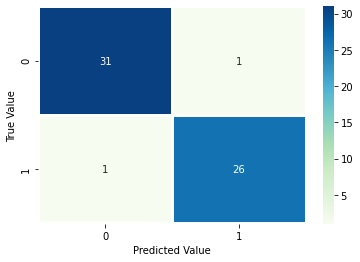

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        32
           1       0.96      0.96      0.96        27

    accuracy                           0.97        59
   macro avg       0.97      0.97      0.97        59
weighted avg       0.97      0.97      0.97        59



0.9629629629629629

In [61]:
#KNN
n = 5
p = 2
knn = KNeighborsClassifier(n_neighbors = n,p = p)
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)
printCM(y_test,y_pred)
print(classification_report(y_test,y_pred))
recall_score(y_test,y_pred, pos_label='1')

## Decision Tree

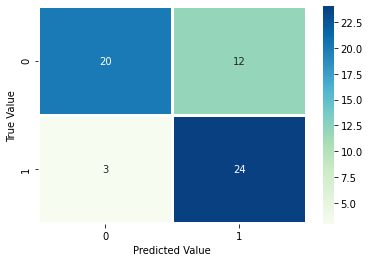

              precision    recall  f1-score   support

           0       0.87      0.62      0.73        32
           1       0.67      0.89      0.76        27

    accuracy                           0.75        59
   macro avg       0.77      0.76      0.74        59
weighted avg       0.78      0.75      0.74        59



0.8888888888888888

In [62]:
criterion = 'gini'
max_dept = 10

DTC = DecisionTreeClassifier(max_depth = max_dept , criterion=criterion)
DTC.fit(x_train,y_train)
y_pred = DTC.predict(x_test)
printCM(y_test,y_pred)
print(classification_report(y_test,y_pred))
recall_score(y_test,y_pred, pos_label='1')

## Random Forest

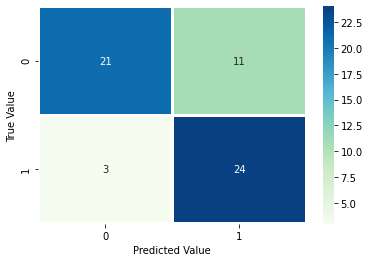

              precision    recall  f1-score   support

           0       0.88      0.66      0.75        32
           1       0.69      0.89      0.77        27

    accuracy                           0.76        59
   macro avg       0.78      0.77      0.76        59
weighted avg       0.79      0.76      0.76        59



0.8888888888888888

In [63]:
## Random Forest

rfm = RandomForestClassifier(n_estimators=100)
rfm.fit(x_train,y_train)
y_pred = rfm.predict(x_test)
printCM(y_test,y_pred)
print(classification_report(y_test,y_pred))
recall_score(y_test,y_pred, pos_label='1')

## Meta Classfier Stacking - (RF + XGBoost + Logistics)

In [64]:
import xgboost as xgb
from xgboost import XGBClassifier

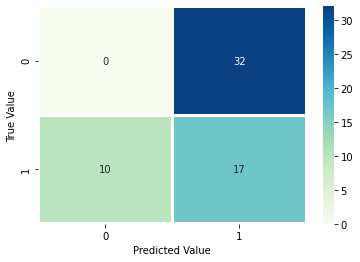

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        32
           1       0.35      0.63      0.45        27

    accuracy                           0.29        59
   macro avg       0.17      0.31      0.22        59
weighted avg       0.16      0.29      0.20        59



0.6296296296296297

In [65]:
from sklearn.ensemble import StackingClassifier
estimators = [
               ('rf', RandomForestClassifier(n_estimators=10, random_state=42)),
               ('XG', XGBClassifier()),
              ]
clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
printCM(y_test,y_pred)
print(classification_report(y_test,y_pred))
recall_score(y_test,y_pred, pos_label='1')

## Meta Classifier Stacking - (RF + NB + Logistics)

In [66]:
import sklearn
from sklearn.ensemble import StackingClassifier

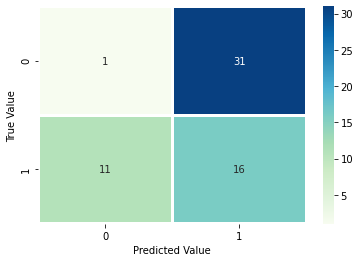

              precision    recall  f1-score   support

           0       0.08      0.03      0.05        32
           1       0.34      0.59      0.43        27

    accuracy                           0.29        59
   macro avg       0.21      0.31      0.24        59
weighted avg       0.20      0.29      0.22        59



0.5925925925925926

In [67]:
estimators = [('rf', RandomForestClassifier(n_estimators=10, random_state=42)),
             ('NB', GaussianNB())]
clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
printCM(y_test,y_pred)
print(classification_report(y_test,y_pred))
recall_score(y_test,y_pred, pos_label='1')

## Meta Classifer Stacking - (KNN + Decsion Tree+GB + Logistics)

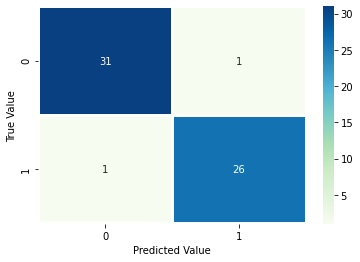

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        32
           1       0.96      0.96      0.96        27

    accuracy                           0.97        59
   macro avg       0.97      0.97      0.97        59
weighted avg       0.97      0.97      0.97        59



0.9629629629629629

In [68]:
estimators = [
               ('KNN', KNeighborsClassifier(n_neighbors = 5,p = 2)),
               ('DT', DecisionTreeClassifier(max_depth = max_dept , criterion=criterion)),
              ('GB' , GradientBoostingClassifier())
              ]
clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
printCM(y_test,y_pred)
print(classification_report(y_test,y_pred))
recall_score(y_test,y_pred, pos_label='1')

## Stratified K-Fold Cross Validation

In [69]:
from sklearn.model_selection import StratifiedKFold
from statistics import mean, stdev 
from sklearn import preprocessing 

In [70]:
n = 10
clf = RandomForestClassifier(n_estimators=100)

In [71]:
skf = StratifiedKFold(n_splits=n, shuffle=True, random_state=1) 
lst_accu_stratified = [] 
   
for train_index, test_index in skf.split(x_train,y_train): 
    x_train_fold, x_test_fold = x_train.iloc[train_index], x_train.iloc[test_index] 
    y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index] 
    clf.fit(x_train_fold, y_train_fold) 
    lst_accu_stratified.append(clf.score(x_test_fold, y_test_fold)) 
    
print('List of possible accuracy:', lst_accu_stratified) 
print('\nMaximum Accuracy That can be obtained from this model is:', 
      max(lst_accu_stratified)*100, '%') 
print('\nMinimum Accuracy:', 
      min(lst_accu_stratified)*100, '%') 
print('\nOverall Accuracy:', 
      mean(lst_accu_stratified)*100, '%') 
print('\nStandard Deviation is:', stdev(lst_accu_stratified)) 

List of possible accuracy: [0.49473684210526314, 0.5894736842105263, 0.5473684210526316, 0.5263157894736842, 0.49473684210526314, 0.5851063829787234, 0.5638297872340425, 0.574468085106383, 0.48936170212765956, 0.5]

Maximum Accuracy That can be obtained from this model is: 58.94736842105262 %

Minimum Accuracy: 48.93617021276596 %

Overall Accuracy: 53.65397536394176 %

Standard Deviation is: 0.04030674219821535


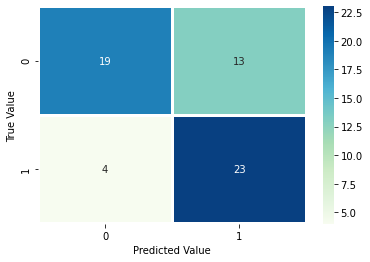

              precision    recall  f1-score   support

           0       0.83      0.59      0.69        32
           1       0.64      0.85      0.73        27

    accuracy                           0.71        59
   macro avg       0.73      0.72      0.71        59
weighted avg       0.74      0.71      0.71        59



0.8518518518518519

In [72]:
y_pred = clf.predict(x_test)
printCM(y_test,y_pred)
print(classification_report(y_test,y_pred))
recall_score(y_test,y_pred, pos_label='1')

## Gradient Boosting

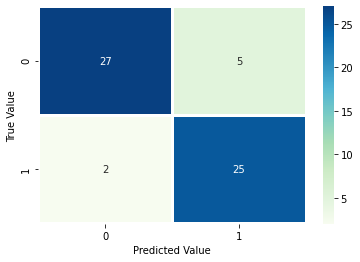

              precision    recall  f1-score   support

           0       0.93      0.84      0.89        32
           1       0.83      0.93      0.88        27

    accuracy                           0.88        59
   macro avg       0.88      0.88      0.88        59
weighted avg       0.89      0.88      0.88        59



0.9259259259259259

In [73]:
GBclf = GradientBoostingClassifier(n_estimators=200)
GBclf.fit(x_train, y_train)
y_pred = GBclf.predict(x_test)
printCM(y_test,y_pred)
print(classification_report(y_test,y_pred))
recall_score(y_test,y_pred, pos_label='1')

## XG Boost

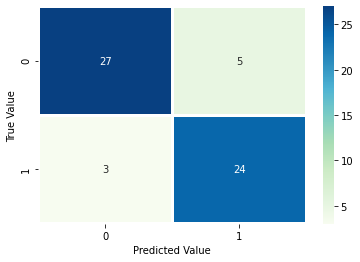

              precision    recall  f1-score   support

           0       0.90      0.84      0.87        32
           1       0.83      0.89      0.86        27

    accuracy                           0.86        59
   macro avg       0.86      0.87      0.86        59
weighted avg       0.87      0.86      0.86        59



0.8888888888888888

In [74]:
from xgboost import XGBClassifier
XGB_clf = XGBClassifier()
XGB_clf.fit(x_train, y_train)
y_pred = XGB_clf.predict(x_test)
printCM(y_test,y_pred)
print(classification_report(y_test,y_pred))
recall_score(y_test,y_pred, pos_label='1')

## LGM

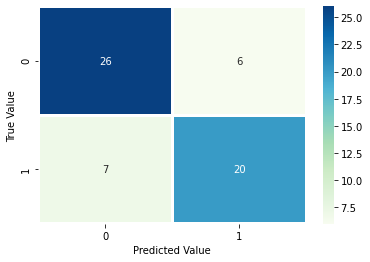

              precision    recall  f1-score   support

           0       0.79      0.81      0.80        32
           1       0.77      0.74      0.75        27

    accuracy                           0.78        59
   macro avg       0.78      0.78      0.78        59
weighted avg       0.78      0.78      0.78        59



0.7407407407407407

In [75]:
import lightgbm as lgb
lgm = lgb.LGBMClassifier()
lgm.fit(x_train, y_train)
y_pred = lgm.predict(x_test)
printCM(y_test,y_pred)
print(classification_report(y_test,y_pred))
recall_score(y_test,y_pred, pos_label='1')

# Conditions for grid search

In [ ]:
#Logistic Regrresion
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
lr_grid = dict(solver=solvers,penalty=penalty,C=c_values)

#K-Nearest - Neighborg
n_neighbors = range(1, 21, 2)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']
knn_grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)

#Random Forest
n_estimators = [10, 100, 1000,10000]
max_features = ['sqrt', 'log2']
rf_grid = dict(n_estimators=n_estimators,max_features=max_features)

#Support Vector Classifier
kernel = ['poly', 'rbf', 'sigmoid']
C = [50, 10, 1.0, 0.1, 0.01]
gamma = ['scale']
svc_grid = dict(kernel=kernel,C=C,gamma=gamma)

## Gradient
n_estimators = [10, 100, 1000]
learning_rate = [0.001, 0.01, 0.1]
subsample = [0.5, 0.7, 1.0]
max_depth = [3, 7, 9]
gradient_grid = dict(n_estimators = n_estimators , learning_rate = learning_rate , subsample= subsample , max_depth = max_depth)

#LGB
class_weight = [None,'balanced']
boosting_type = ['gbdt', 'goss', 'dart']
num_leaves = [30,50,100,150] #list(range(30, 150)),
learning_rate = list(np.logspace(np.log(0.005), np.log(0.2), base = np.exp(1), num = 10)) #1000
lgg_grid = dict(class_weight=class_weight, boosting_type=boosting_type, num_leaves=num_leaves, learning_rate =learning_rate)